In [201]:
import stats as st
import numpy as np
import coop_post_processing as cpp
from scipy import stats
import matplotlib.pyplot as plt
import scipy as sp
# autoreload
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]

In [76]:
obspath  = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
acty_mapstr = f'ilc_SZ_yy_4096_hpx'
pt_selection_str = 'nugt2_egtpt3_'
dbin = dbins[0]


In [108]:
act_obj_finebins, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=False, binsize=2)
act_obj_mfinebins, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=False, binsize=3)
act_obj_fid, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=True, binsize=7.5)
act_obj_midbins, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=False, binsize=4)
act_obj_mlbins, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=False, binsize=6)
act_obj_lrgbins, (zlow,zhi) = cpp.retrieve_stack_info(obspath, acty_mapstr, pt_selection_str, dbin, remove_r30=False, binsize=10)

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl


retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mp

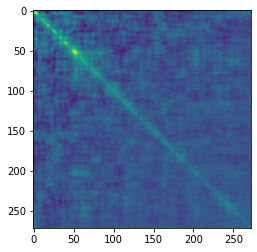

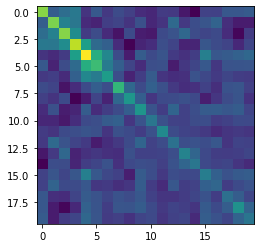

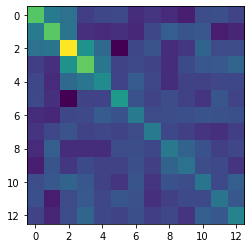

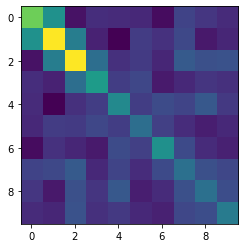

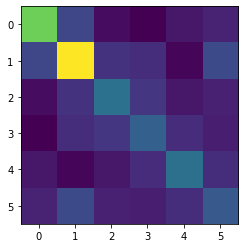

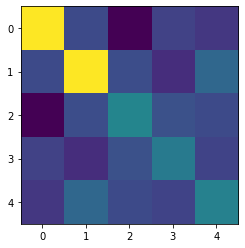

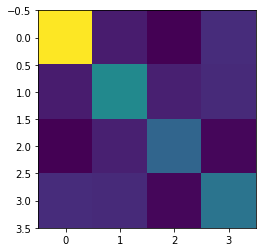

<Figure size 432x288 with 0 Axes>

In [173]:
# plot the covmats
m=3

plt.imshow(act_obj_finebins.covmat_full[m])
plt.show()
plt.clf()

plt.imshow(act_obj_finebins.covmat_binned[m])
plt.show()
plt.clf()

plt.imshow(act_obj_mfinebins.covmat_binned[m])
plt.show()
plt.clf()


plt.imshow(act_obj_midbins.covmat_binned[m])
plt.show()
plt.clf()

plt.imshow(act_obj_mlbins.covmat_binned[m])
plt.show()
plt.clf()

plt.imshow(act_obj_fid.covmat_binned[m])
plt.show()
plt.clf()

plt.imshow(act_obj_lrgbins.covmat_binned[m])
plt.show()
plt.clf()



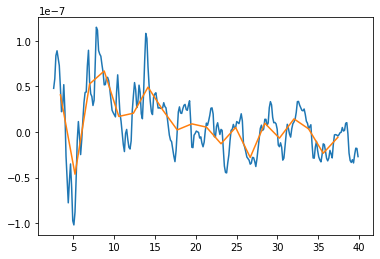

In [174]:
plt.plot(act_obj_finebins.r, act_obj_finebins.avg_profiles[m])
plt.plot(act_obj_finebins.r_binned, act_obj_finebins.avg_profiles_binned[m])

In [186]:
# null_vec_full = np.zeros(len(act_obj_finebins.r))
# chi2_full = st.chisq(act_obj_finebins.avg_profiles[m], null_vec_full, act_obj_finebins.covmat_full[m])
null_vec = np.zeros(len(act_obj_fid.r_binned))
chi2_fid = st.chisq(act_obj_fid.avg_profiles_binned[m], null_vec, act_obj_fid.covmat_binned[m])
null_vec_finebins = np.zeros(len(act_obj_finebins.r_binned))
chi2_finebins = st.chisq(act_obj_finebins.avg_profiles_binned[m], null_vec_finebins, act_obj_finebins.covmat_binned[m])
null_vec_mfinebins = np.zeros(len(act_obj_mfinebins.r_binned))
chi2_mfinebins = st.chisq(act_obj_mfinebins.avg_profiles_binned[m], null_vec_mfinebins, act_obj_mfinebins.covmat_binned[m])
null_vec_midbins = np.zeros(len(act_obj_midbins.r_binned))
chi2_midbins = st.chisq(act_obj_midbins.avg_profiles_binned[m], null_vec_midbins, act_obj_midbins.covmat_binned[m])
null_vec_mlbins = np.zeros(len(act_obj_mlbins.r_binned))
chi2_mlbins = st.chisq(act_obj_mlbins.avg_profiles_binned[m], null_vec_mlbins, act_obj_mlbins.covmat_binned[m])
null_vec_lrgbins = np.zeros(len(act_obj_lrgbins.r_binned))
chi2_lrgbins = st.chisq(act_obj_lrgbins.avg_profiles_binned[m], null_vec_lrgbins, act_obj_lrgbins.covmat_binned[m])


pos def.
pos def.
pos def.
pos def.
pos def.
pos def.


In [176]:
# binning order is 2, 3, 4, 6, 7.5, 10
np.sqrt(chi2_full), np.sqrt(chi2_finebins),np.sqrt(chi2_mfinebins), np.sqrt(chi2_midbins), np.sqrt(chi2_mlbins),  np.sqrt(chi2_fid), np.sqrt(chi2_lrgbins)
# reduced chisqr
# chi2_full/len(act_obj_finebins.r), chi2_finebins/len(act_obj_finebins.r_binned),chi2_mfinebins/len(act_obj_mfinebins.r_binned), chi2_midbins/len(act_obj_midbins.r_binned), chi2_mlbins/len(act_obj_mlbins.r_binned),  chi2_fid/len(act_obj_fid.r_binned), chi2_lrgbins/len(act_obj_lrgbins.r_binned)

/tmp/ipykernel_214032/3693676523.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(chi2_full), np.sqrt(chi2_finebins),np.sqrt(chi2_mfinebins), np.sqrt(chi2_midbins), np.sqrt(chi2_mlbins),  np.sqrt(chi2_fid), np.sqrt(chi2_lrgbins)


(nan,
 8.993870966586899,
 3.6411149531638856,
 3.786481963607407,
 2.1849004198694613,
 2.056566161898721,
 2.029097059327327)

In [ ]:
chi2_full = st.chisq(act_obj_finebins.avg_profiles[m], null_vec_full, act_obj_finebins.covmat_full[m])


In [157]:
np.amin(act_obj_finebins.avg_profiles[m])

-7.638837343193914e-08

In [167]:
np.mean(act_obj_finebins.avg_profiles[m])

1.0348167624110518e-08

In [208]:
np.sqrt(80)

8.94427190999916

26.290000836757798 80.88971496361476
9.026661894430605 80.88971496361476
19.59726896283926 80.88971496361476
20.225813191620293 80.88971496361476


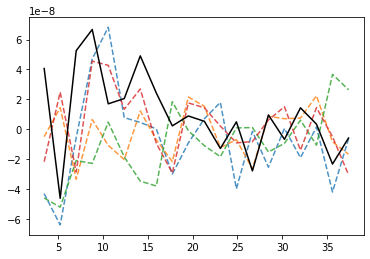

In [215]:
sim_small = np.random.multivariate_normal(null_vec_finebins, act_obj_finebins.covmat_binned[m], size=200)
for s,sim in enumerate(sim_small):
    plt.plot(act_obj_finebins.r_binned, sim, alpha=.8, linestyle='dashed')
    chisq_null = st.chisq(sim, null_vec_finebins, act_obj_finebins.covmat_binned[m])
    chisq_dv = st.chisq(act_obj_finebins.avg_profiles_binned[m], null_vec_finebins, act_obj_finebins.covmat_binned[m])
    print(chisq_null, chisq_dv)
    if s==3:
        break
# plt.plot(act_obj_finebins.r, act_obj_finebins.avg_profiles[m])
plt.plot(act_obj_finebins.r_binned, act_obj_finebins.avg_profiles_binned[m], 'black')

In [130]:
chi2_full

1.773462108004e+16

In [198]:
def snr_from_pte(data_vector, null_vector, covmat, chisq_data=None, nsamples=10**6):
    exceeds = np.zeros(nsamples)
    if chisq_data is None:
        chisq_data = st.chisq(data_vector, null_vector, covmat)
    sim = np.random.multivariate_normal(null_vector, covmat, size=nsamples)
    chi2null_list = []
    for i in range(nsamples):
        chisq_null = st.chisq(sim[i], null_vector, covmat)
        if chisq_null > chisq_data:
            exceeds[i] = 1
        chi2null_list.append(chisq_null)
    print("Number exceeding: ", len(np.where(exceeds == 1)[0]))
    pte = len(np.where(exceeds == 1)[0])/(float(nsamples))
    snr_erf = np.sqrt(2.) * sp.special.erfinv(1.-pte)
    snr_chi2 = np.sqrt(stats.chi2.ppf(1 - pte, len(data_vector)))
    return(pte,snr_erf,snr_chi2,chi2null_list)

Does the SNR from PTE depend on binning?

In [202]:
pte_finebins, snr_erf_finebins, snr_chi2_finebins, chi2null_list_finebins = snr_from_pte(act_obj_finebins.avg_profiles_binned[m], null_vec_finebins, act_obj_finebins.covmat_binned[m])
pte_mfinebins, snr_erf_mfinebins, snr_chi2_mfinebins, chi2null_list_mfinebins = snr_from_pte(act_obj_mfinebins.avg_profiles_binned[m], null_vec_mfinebins, act_obj_mfinebins.covmat_binned[m])
pte_midbins, snr_erf_midbins, snr_chi2_midbins, chi2null_list_midbins = snr_from_pte(act_obj_midbins.avg_profiles_binned[m], null_vec_midbins, act_obj_midbins.covmat_binned[m])
pte_mlbins, snr_erf_mlbins, snr_chi2_mlbins, chi2null_list_mlbins = snr_from_pte(act_obj_mlbins.avg_profiles_binned[m], null_vec_mlbins, act_obj_mlbins.covmat_binned[m])
pte_fid, snr_erf_fid, snr_chi2_fid, chi2null_list_fid = snr_from_pte(act_obj_fid.avg_profiles_binned[m], null_vec, act_obj_fid.covmat_binned[m])
pte_lrgbins, snr_erf_lrgbins, snr_chi2_lrgbins, chi2null_list_lrgbins = snr_from_pte(act_obj_lrgbins.avg_profiles_binned[m], null_vec_lrgbins, act_obj_lrgbins.covmat_binned[m])



Number exceeding:  0
Number exceeding:  426752
Number exceeding:  157979
Number exceeding:  573662
Number exceeding:  517390
Number exceeding:  390660


(array([7.750e+02, 3.081e+03, 3.166e+03, 1.863e+03, 7.350e+02, 2.700e+02,
        8.000e+01, 2.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.7047139 ,  4.42947273,  8.15423156, 11.87899039, 15.60374923,
        19.32850806, 23.05326689, 26.77802572, 30.50278455, 34.22754339,
        37.95230222]),
 <BarContainer object of 10 artists>)

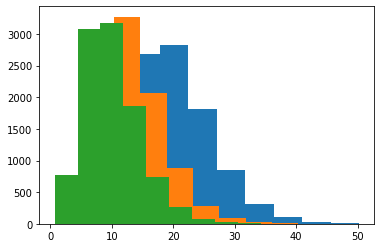

In [203]:
plt.hist(chi2null_list_finebins[:10000])
plt.hist(chi2null_list_mfinebins[:10000])
plt.hist(chi2null_list_midbins[:10000])

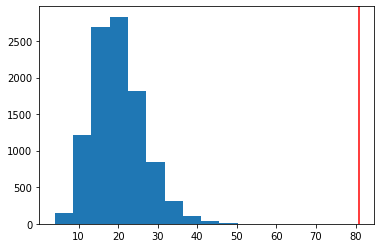

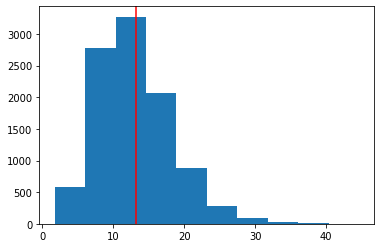

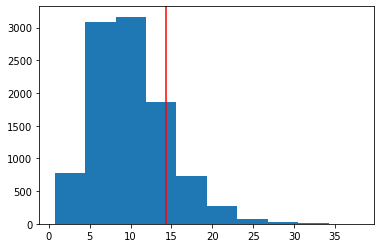

<Figure size 432x288 with 0 Axes>

In [204]:
plt.hist(chi2null_list_finebins[:10000])
plt.axvline(chi2_finebins, color='r')
plt.show()
plt.clf()

plt.hist(chi2null_list_mfinebins[:10000])
plt.axvline(chi2_mfinebins, color='r')
plt.show()
plt.clf()

plt.hist(chi2null_list_midbins[:10000])
plt.axvline(chi2_midbins, color='r')
plt.show()
plt.clf()

In [205]:
print(pte_finebins, snr_erf_finebins, snr_chi2_finebins)
print(pte_mfinebins, snr_erf_mfinebins, snr_chi2_mfinebins)
print(pte_midbins, snr_erf_midbins, snr_chi2_midbins)
print(pte_mlbins, snr_erf_mlbins, snr_chi2_mlbins)
print(pte_fid, snr_erf_fid, snr_chi2_fid)
print(pte_lrgbins, snr_erf_lrgbins, snr_chi2_lrgbins)

0.0 inf inf
0.426752 0.7947619301737257 3.643577081174402
0.157979 1.4119013846228938 3.787010460767045
0.573662 0.5626664999044317 2.1839815942673515
0.51739 0.6473738747878638 2.055666967108758
0.39066 0.85842106487642 2.0285574497550862


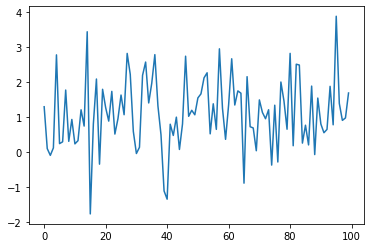

In [53]:
# test for degrees of freedom
# simulate a data vector with a covariance matrix
dvec = np.random.normal(1,1,100)
plt.plot(dvec)